In [1]:
import torch as th
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
from torch import nn
import torch.optim as tho

In [2]:
device="cuda" if th.cuda.is_available()else "cpu"

In [3]:
device

'cpu'

In [4]:
x,y=sklearn.datasets.make_circles(n_samples=3000,random_state=45,noise=0.04)

In [5]:
x_pd=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"y":y})
print("datalarimiz\n\n",x_pd)

datalarimiz

             x1        x2  y
0     0.972975  0.245492  0
1    -0.942595 -0.290757  0
2    -0.865511  0.446661  0
3    -0.799320  0.587927  0
4    -1.047313 -0.148742  0
...        ...       ... ..
2995  0.878425  0.623895  0
2996 -0.815898  0.492028  0
2997 -0.097279  0.821299  1
2998  0.634069  0.402300  1
2999 -0.518494 -0.651541  1

[3000 rows x 3 columns]


In [6]:
x_pd.head(100)

,x1,x2,y
0,0.972975,0.245492,0
1,-0.942595,-0.290757,0
2,-0.865511,0.446661,0
3,-0.799320,0.587927,0
4,-1.047313,-0.148742,0
...,...,...,...
95,0.395509,-0.935349,0
96,-0.484331,-0.719410,1
97,-0.426728,0.688446,1
98,-0.340108,0.780434,1


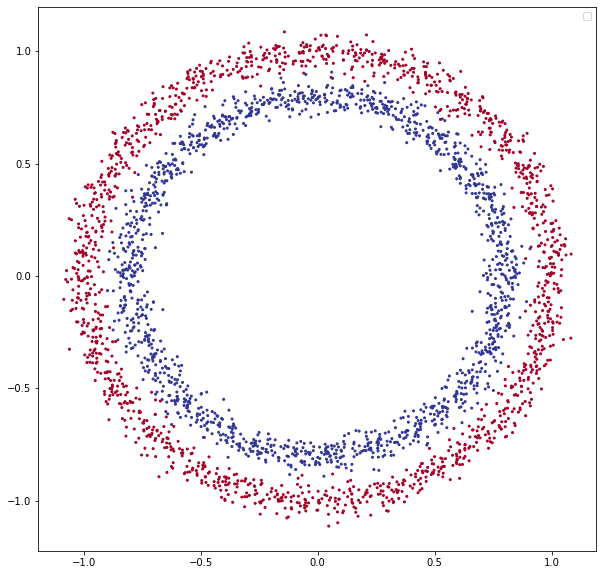

In [7]:
plt.figure(figsize=[10,10])
plt.scatter(x=x[:,0],y=x[:,1],c=y,s=4,cmap=plt.cm.RdYlBu)
plt.legend()

In [8]:
x=th.from_numpy(x).type(th.float)
y=th.from_numpy(y).type(th.float)

In [9]:
class circles(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    #self.layers1=nn.Linear(in_features=2,out_features=5)
    #self.layers2=nn.Linear(in_features=5,out_features=1)
    self.two_linear_layers=nn.Sequential(nn.Linear(in_features=2,out_features=5),nn.Linear(in_features=5,out_features=1),)
  def forward(self,x): 
    #self.layers2(self.layers1(x))
    return self.two_linear_layers(x)

In [10]:
model=circles().to(device)

In [11]:
model.state_dict()

OrderedDict([('two_linear_layers.0.weight', tensor([[ 0.5603,  0.2978],
                      [-0.4224,  0.1621],
                      [ 0.1856,  0.3622],
                      [-0.6556, -0.6158],
                      [ 0.1720, -0.1827]])),
             ('two_linear_layers.0.bias',
              tensor([-0.6629,  0.1696, -0.6637,  0.2056,  0.2853])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.3652, -0.2069,  0.2126,  0.0681,  0.1458]])),
             ('two_linear_layers.1.bias', tensor([0.1054]))])

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=45)

In [13]:
loss_fn=nn.BCEWithLogitsLoss()


In [14]:
optimizer=tho.SGD(model.parameters(),lr=0.01)

In [15]:
def accuracy_fn(y_true,y_pred):
  correct=th.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc  

In [16]:
model.eval()
with th.inference_mode():
  y_logits=model(x_test.to(device))[:5]
y_logits

tensor([[-0.3799],
        [ 0.0109],
        [-0.4633],
        [-0.2438],
        [-0.5769]])

In [17]:
with th.inference_mode():
 y_logits=model(x_test.to(device))[:5]
y_logits

tensor([[-0.3799],
        [ 0.0109],
        [-0.4633],
        [-0.2438],
        [-0.5769]])

In [18]:
y_preds_prob=th.sigmoid(y_logits)
y_preds_prob
#ın_full
y_pred_labels =th.round(th.sigmoid(model(x_test.to(device)[:5])))
y_pred_labels

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [19]:
y_test[:5]

tensor([0., 0., 1., 1., 0.])

In [20]:
y_preds=th.round(y_preds_prob)

In [21]:
th.eq(y_pred_labels,y_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

In [22]:
th.manual_seed(45)
th.cuda.manual_seed(45)
epochs=100
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model.train()
  y_logits=model(x_train).squeeze()
  y_preds=th.round(th.sigmoid(y_logits))
  loss=loss_fn(th.round(th.sigmoid(y_logits)),y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with th.inference_mode():
    test_logits=model(x_test).squeeze()
    test_preds=th.round(th.sigmoid(test_logits))
    testloss=loss_fn(test_logits,y_test)
    testacc=accuracy_fn(y_test,test_preds)
    if epoch%10==0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {testloss:.5f}, Test acc: {testacc:.2f}%")

    



Epoch: 0 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 10 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 20 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 30 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 40 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 50 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 60 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 70 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 80 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%
Epoch: 90 | Loss: 0.74497, Accuracy: 43.44% | Test loss: 0.71188, Test acc: 39.92%


In [23]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

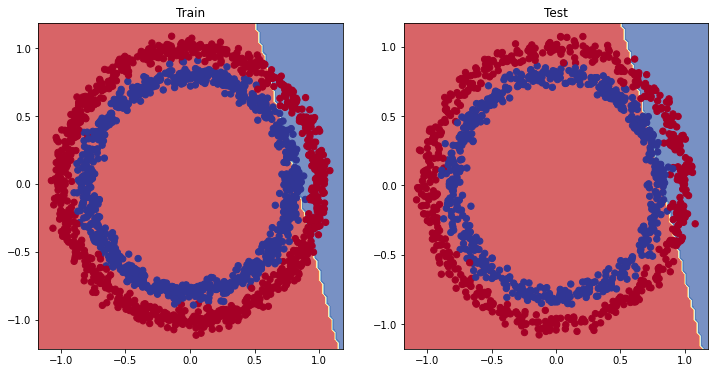

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)


In [25]:
class curcules1(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.layer1=nn.Linear(in_features=2 ,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
            # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()
  def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [26]:

model_3 = curcules1().to(device)
print(model_3)

curcules1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
